In [ ]:
# Install kaggle
!pip install kaggle



In [ ]:
# Upload the kaggle.json file
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"alaashorbaji","key":"dd3b4b8c063a3d84fb12e92072782756"}'}

In [ ]:
# ✅ Step 3: Move kaggle.json and set permissions
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
import zipfile

# ✅ Download the dataset
!kaggle datasets download -d sakshamjn/vehicle-detection-8-classes-object-detection

# ✅ Unzip it
with zipfile.ZipFile("vehicle-detection-8-classes-object-detection.zip", 'r') as zip_ref:
    zip_ref.extractall("vehicle_data")

Dataset URL: https://www.kaggle.com/datasets/sakshamjn/vehicle-detection-8-classes-object-detection
License(s): unknown
vehicle-detection-8-classes-object-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


# Install YOLOv8

In [ ]:
!pip install ultralytics --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 112.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Split data into train and val

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
image_dir = "/content/vehicle_data/train/images"
label_dir = "/content/vehicle_data/train/labels"

val_image_dir = "/content/vehicle_data/val/images"
val_label_dir = "/content/vehicle_data/val/labels"

os.makedirs(val_image_dir, exist_ok=True)
os.makedirs(val_label_dir, exist_ok=True)

# Get all image files
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg") or f.endswith(".png")]

# Split into train and val (80/20)
train_files, val_files = train_test_split(image_files, test_size=0.2, random_state=42)

# Move validation images and labels
for file in val_files:
    shutil.move(os.path.join(image_dir, file), os.path.join(val_image_dir, file))

    label_file = file.rsplit(".", 1)[0] + ".txt"
    if os.path.exists(os.path.join(label_dir, label_file)):
        shutil.move(os.path.join(label_dir, label_file), os.path.join(val_label_dir, label_file))


In [ ]:
#vehicle_data/
#├── train/
#│   ├── images/
#│   └── labels/
#├── val/
#    ├── images/
#    └── labels/


# Preview Dataset Samples with Bounding Boxes (YOLO format)

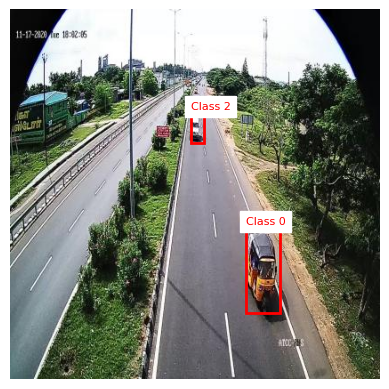

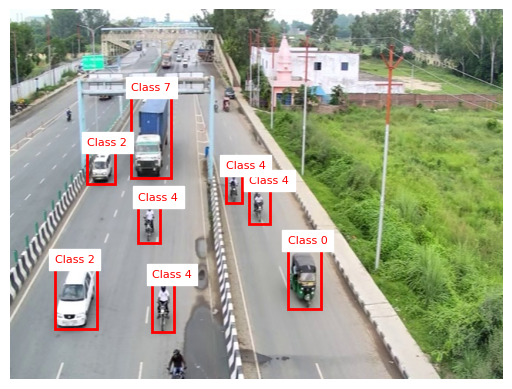

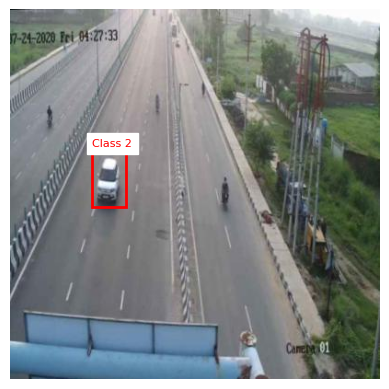

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Define image and label directories
image_path = "/content/vehicle_data/train/images"
label_path = "/content/vehicle_data/train/labels"

# Function to display a single image with bounding boxes
def show_image_with_boxes(image_file):
    # Load the image
    img = plt.imread(os.path.join(image_path, image_file))

    # Get corresponding label file
    label_file = image_file.rsplit(".", 1)[0] + ".txt"
    full_label_path = os.path.join(label_path, label_file)

    # Create the plot
    fig, ax = plt.subplots()
    ax.imshow(img)

    # If label file exists, draw boxes
    if os.path.exists(full_label_path):
        with open(full_label_path, "r") as f:
            for line in f:
                cls, x_center, y_center, width, height = map(float, line.strip().split())

                # Convert normalized values to pixel coordinates
                img_h, img_w = img.shape[:2]
                x = (x_center - width / 2) * img_w
                y = (y_center - height / 2) * img_h
                w = width * img_w
                h = height * img_h

                # Draw the bounding box
                rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)

                # Display class label
                ax.text(x, y - 5, f"Class {int(cls)}", color='red', fontsize=8, backgroundcolor='white')

    plt.axis('off')
    plt.show()

# ✅ Display the first 3 sample images with bounding boxes
sample_images = os.listdir(image_path)[:3]
for img_file in sample_images:
    show_image_with_boxes(img_file)


# Create data.yaml for YOLOv8 Training

In [ ]:
import yaml

# Define the dataset paths and class names
data_config = {
    "train": "/content/vehicle_data/train/images",
    "val": "/content/vehicle_data/train/images",  # Can be changed if separate val set is available
    "nc": 8,
    "names": ["Ambulance", "Auto rickshaw", "Bus", "Car", "Motorcycle", "Truck", "Van", "Bicycle"]
}

# Save it to a YAML file
with open("data.yaml", "w") as file:
    yaml.dump(data_config, file, default_flow_style=False)

print("✅ data.yaml has been created.")


✅ data.yaml has been created.


# Verify the YAML file

In [ ]:
# Print the content of data.yaml
!cat data.yaml


names:
- Ambulance
- Auto rickshaw
- Bus
- Car
- Motorcycle
- Truck
- Van
- Bicycle
nc: 8
train: /content/vehicle_data/train/images
val: /content/vehicle_data/train/images


# Train YOLOv8 on Custom Dataset

In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Create and train YOLOv8 model
model = YOLO('yolov8n.yaml')  # You can replace with yolov8s.yaml, yolov8m.yaml, etc.

# Start training
model.train(
    data='data.yaml',
    epochs=20,
    imgsz=640,
    batch=16,
    name='yolov8_vehicle_detector',
    project='/content/yolo_vehicle_project',
    pretrained=True  # Use pretrained weights
)


Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_vehicle_detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

100%|██████████| 755k/755k [00:00<00:00, 86.9MB/s]

Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

YOLOv8n summary: 129 layers, 3,012,408 parameters, 3,012,392 gradients, 8.2 GFLOPs

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 328MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 913.7±389.1 MB/s, size: 28.5 KB)


train: Scanning /content/vehicle_data/train/labels... 6574 images, 15 backgrounds, 0 corrupt: 100%|██████████| 6574/6574 [00:04<00:00, 1547.05it/s]

train: /content/vehicle_data/train/images/highway_2784_2020-08-26.jpg: 1 duplicate labels removed
train: /content/vehicle_data/train/images/highway_3297_2020-08-26.jpg: 1 duplicate labels removed


train: New cache created: /content/vehicle_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 786.8±264.0 MB/s, size: 67.5 KB)


val: Scanning /content/vehicle_data/train/labels.cache... 6574 images, 15 backgrounds, 0 corrupt: 100%|██████████| 6574/6574 [00:00<?, ?it/s]

train: /content/vehicle_data/train/images/highway_2784_2020-08-26.jpg: 1 duplicate labels removed
train: /content/vehicle_data/train/images/highway_3297_2020-08-26.jpg: 1 duplicate labels removed


Plotting labels to /content/yolo_vehicle_project/yolov8_vehicle_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/yolo_vehicle_project/yolov8_vehicle_detector
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.11G       3.31      4.358      3.281         55        640: 100%|██████████| 411/411 [00:40<00:00, 10.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:27<00:00,  7.40it/s]


                   all       6574      20996      0.258      0.202      0.133     0.0482

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.6G      2.034       2.27      1.913         59        640: 100%|██████████| 411/411 [00:37<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:26<00:00,  7.92it/s]


                   all       6574      20996      0.359      0.369       0.29      0.132

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      2.62G      1.776      1.751      1.637         60        640: 100%|██████████| 411/411 [00:36<00:00, 11.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:25<00:00,  8.02it/s]


                   all       6574      20996      0.392      0.525       0.39      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      2.62G      1.684      1.544      1.544         58        640: 100%|██████████| 411/411 [00:36<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.25it/s]


                   all       6574      20996      0.346      0.546       0.39      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      2.62G      1.613      1.429      1.487         80        640: 100%|██████████| 411/411 [00:36<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.25it/s]


                   all       6574      20996      0.373      0.594      0.438      0.251

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      2.63G      1.557      1.343      1.441         57        640: 100%|██████████| 411/411 [00:35<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.27it/s]


                   all       6574      20996      0.448      0.594      0.486      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      2.63G      1.529      1.298       1.42         49        640: 100%|██████████| 411/411 [00:36<00:00, 11.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.28it/s]


                   all       6574      20996      0.464       0.63      0.509      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.63G      1.497      1.264        1.4         55        640: 100%|██████████| 411/411 [00:36<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.34it/s]


                   all       6574      20996       0.51      0.654      0.551      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      2.63G      1.464      1.221      1.378         55        640: 100%|██████████| 411/411 [00:35<00:00, 11.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.41it/s]


                   all       6574      20996      0.487      0.634      0.553      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      2.63G      1.449      1.178      1.366         65        640: 100%|██████████| 411/411 [00:36<00:00, 11.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.25it/s]


                   all       6574      20996       0.52      0.613      0.563      0.341
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      2.63G      1.405      1.075      1.385         42        640: 100%|██████████| 411/411 [00:36<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:25<00:00,  8.23it/s]


                   all       6574      20996      0.568       0.66      0.609      0.371

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.63G      1.385      1.028      1.372         45        640: 100%|██████████| 411/411 [00:35<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.30it/s]


                   all       6574      20996      0.572      0.677      0.622      0.395

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.63G      1.361     0.9972       1.35         45        640: 100%|██████████| 411/411 [00:35<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.39it/s]


                   all       6574      20996      0.606      0.692      0.658      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      2.63G      1.353     0.9825      1.344         45        640: 100%|██████████| 411/411 [00:35<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.32it/s]


                   all       6574      20996      0.624      0.699      0.657      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      2.63G      1.326     0.9634      1.329         42        640: 100%|██████████| 411/411 [00:35<00:00, 11.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.37it/s]


                   all       6574      20996       0.62      0.699       0.68      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      2.63G      1.317      0.941      1.321         45        640: 100%|██████████| 411/411 [00:35<00:00, 11.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.33it/s]


                   all       6574      20996      0.629      0.708      0.682      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.63G      1.295     0.9248      1.306         41        640: 100%|██████████| 411/411 [00:35<00:00, 11.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:25<00:00,  8.23it/s]


                   all       6574      20996      0.661      0.707      0.703      0.462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.63G      1.285     0.9093      1.305         34        640: 100%|██████████| 411/411 [00:35<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:25<00:00,  8.18it/s]


                   all       6574      20996      0.663      0.714      0.715      0.473

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      2.63G      1.276     0.8972       1.29         41        640: 100%|██████████| 411/411 [00:35<00:00, 11.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.35it/s]


                   all       6574      20996      0.679      0.706      0.723      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.63G      1.266     0.8818      1.285         50        640: 100%|██████████| 411/411 [00:35<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:24<00:00,  8.36it/s]


                   all       6574      20996      0.683       0.71      0.726      0.489

20 epochs completed in 0.344 hours.
Optimizer stripped from /content/yolo_vehicle_project/yolov8_vehicle_detector/weights/last.pt, 6.2MB
Optimizer stripped from /content/yolo_vehicle_project/yolov8_vehicle_detector/weights/best.pt, 6.2MB

Validating /content/yolo_vehicle_project/yolov8_vehicle_detector/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 206/206 [00:28<00:00,  7.25it/s]


                   all       6574      20996      0.682       0.71      0.726      0.489
             Ambulance        597        680      0.693      0.778      0.768       0.47
         Auto rickshaw        994       1069      0.693       0.75      0.793      0.593
                   Bus       4660       9177      0.853      0.907      0.938      0.635
                   Car        745        772      0.589      0.388      0.502      0.368
            Motorcycle       3308       5850      0.768      0.783      0.841      0.446
                 Truck        879        937      0.531      0.639      0.579      0.443
                   Van        132        133      0.757      0.692      0.748      0.501
               Bicycle       2094       2378      0.575       0.74       0.64      0.455
Speed: 0.1ms preprocess, 0.5ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to /content/yolo_vehicle_project/yolov8_vehicle_detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ab88a9e6a90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

# View Training Results

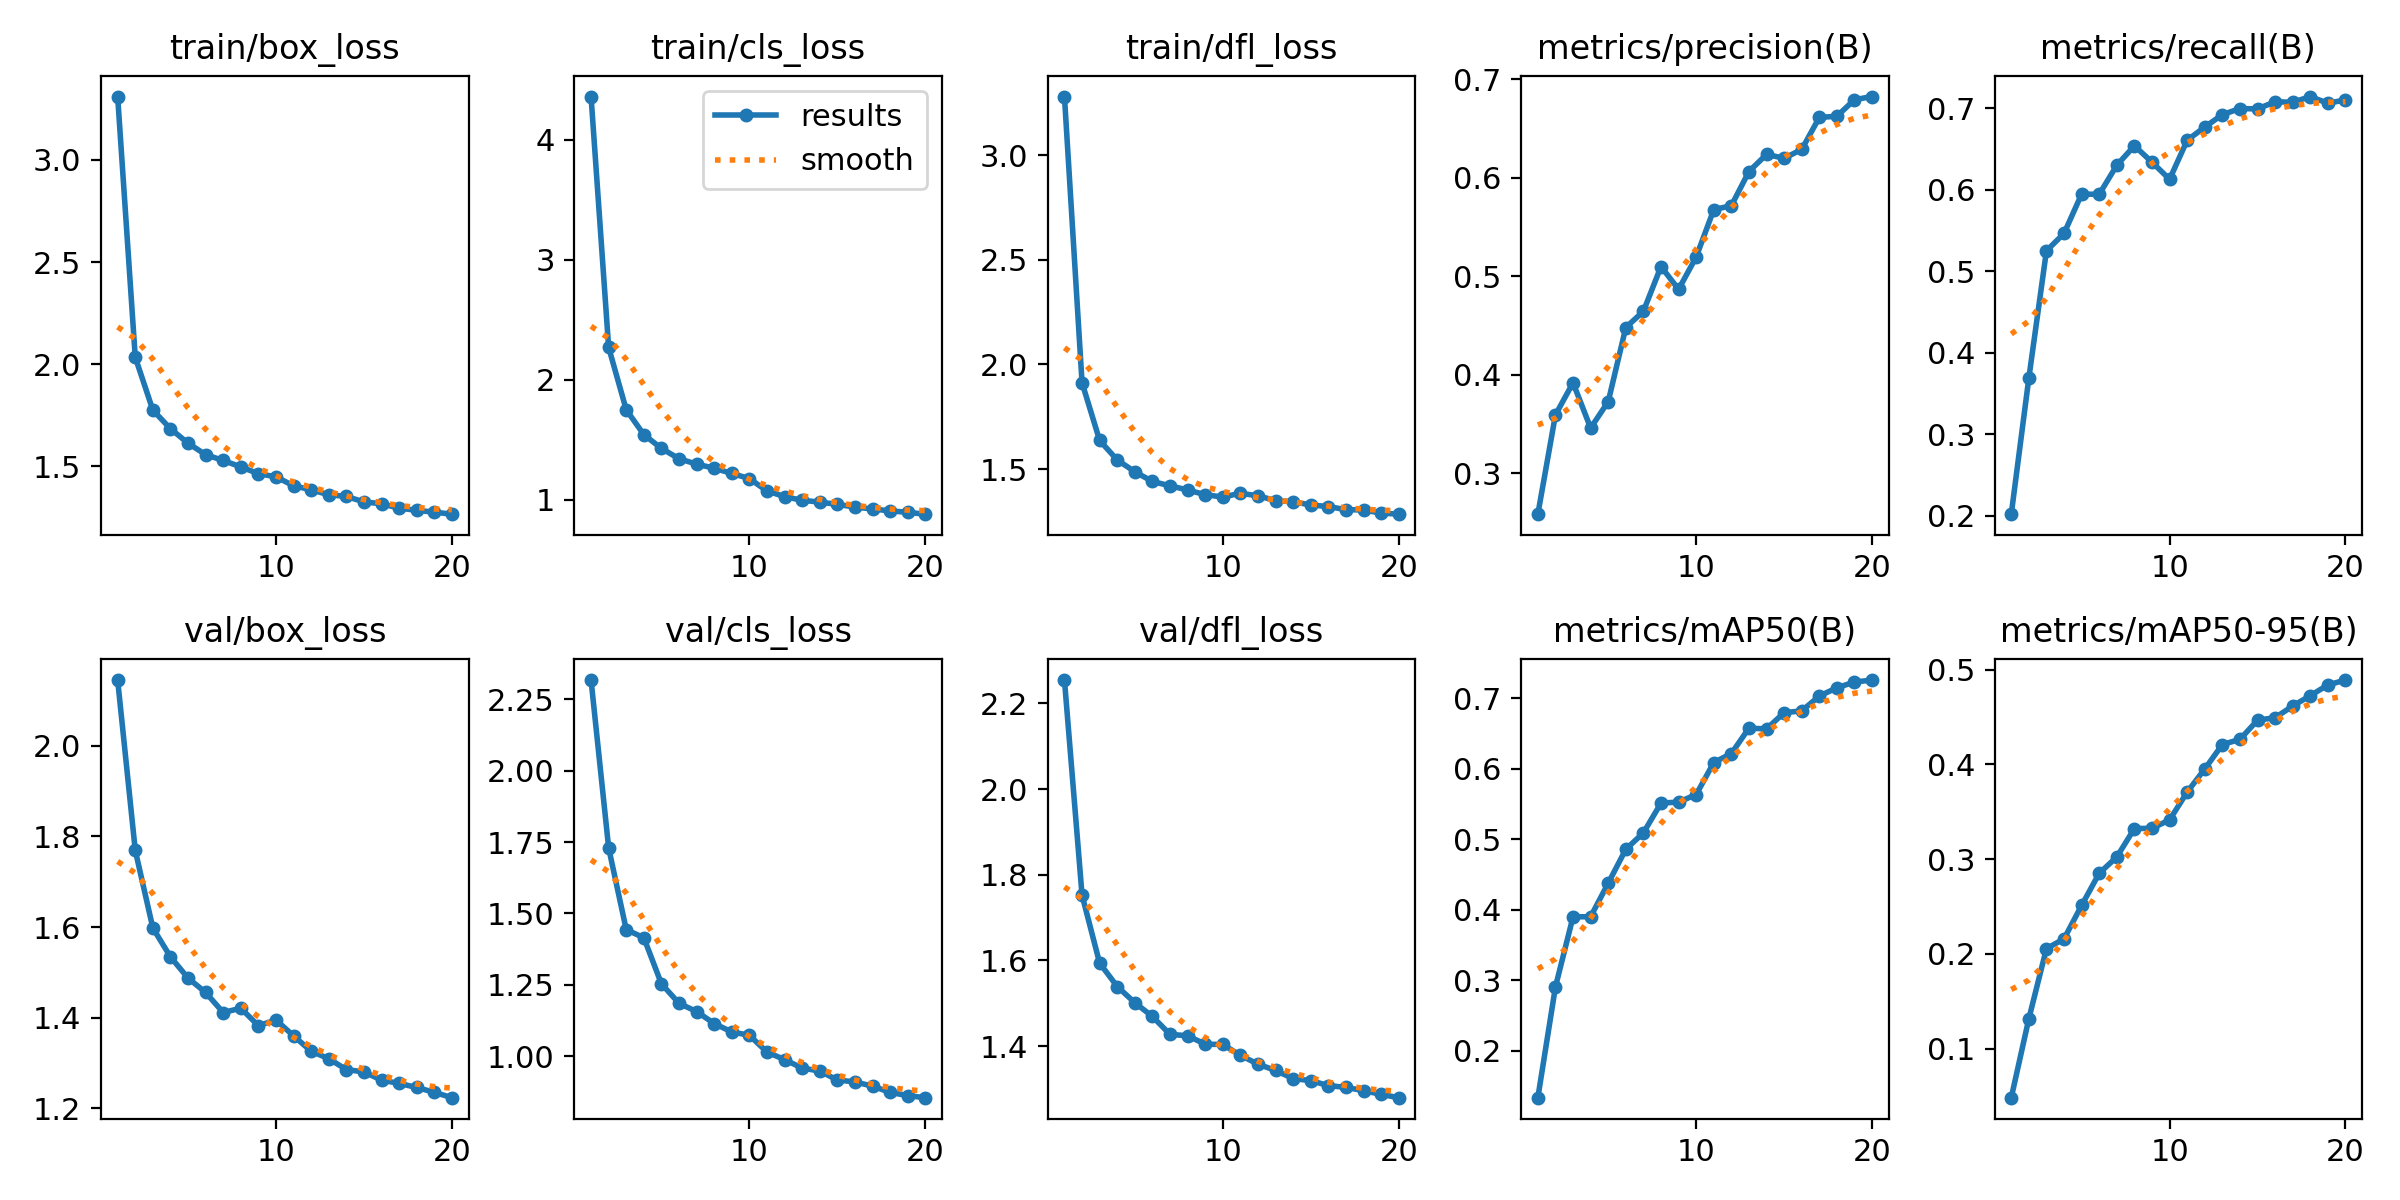

In [ ]:
# View training results (losses, mAP, precision, recall curves)
from IPython.display import Image, display

display(Image(filename='/content/yolo_vehicle_project/yolov8_vehicle_detector/results.png'))



image 1/5 /content/sample_images/Highway_1918_2020-07-30_jpg.rf.0ec5577496f690e0b4526cf1929c1ad6.jpg: 640x640 2 Buss, 9.2ms
image 2/5 /content/sample_images/Highway_344_2020-07-30_jpg.rf.fe625b5c0e98af12dc4ecea4ad8e95e3.jpg: 640x640 1 Bus, 1 Motorcycle, 7.8ms
image 3/5 /content/sample_images/highway_3577_2020-08-26.jpg: 480x640 1 Ambulance, 2 Buss, 5 Motorcycles, 1 Bicycle, 8.1ms
image 4/5 /content/sample_images/ulu1959_jpg.rf.7a35ab6fbdbc8aa0e06360dfb7f79544.jpg: 640x640 1 Ambulance, 1 Bus, 8.1ms
image 5/5 /content/sample_images/ulu2595_jpg.rf.be24e6b4fb46589b860e756acbd7effc.jpg: 640x640 1 Motorcycle, 1 Truck, 1 Bicycle, 7.5ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3


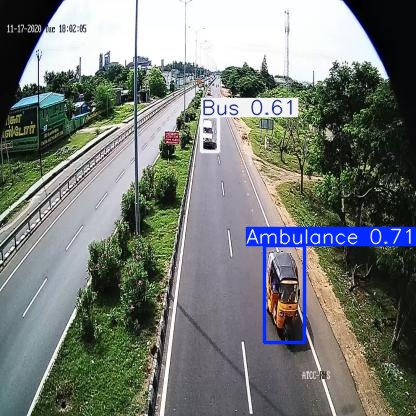

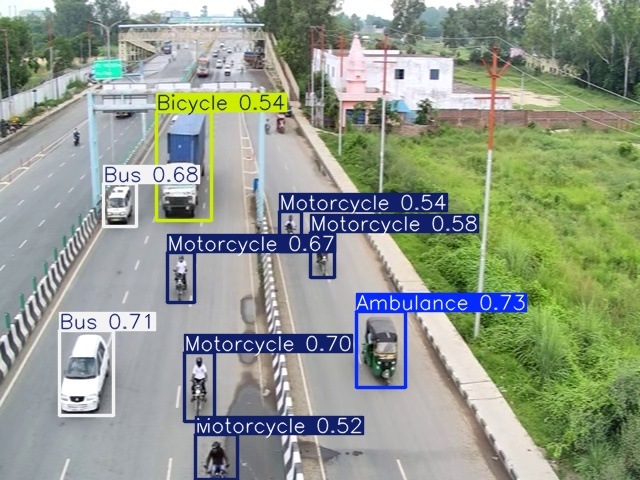

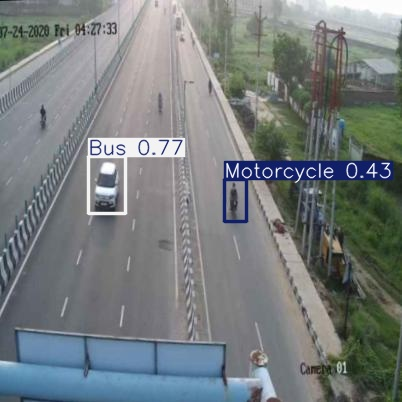

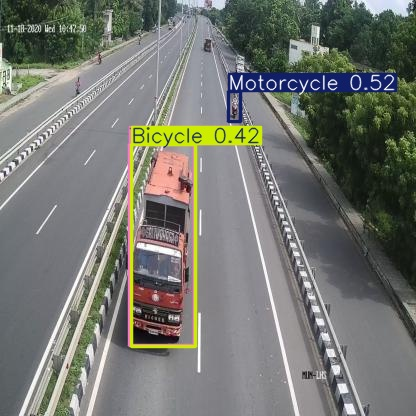

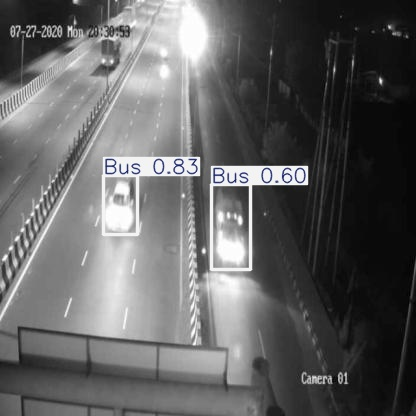

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
import shutil

# ✅ Load the model
model = YOLO("/content/yolo_vehicle_project/yolov8_vehicle_detector/weights/best.pt")

# ✅ Create a temporary folder with a few images only
os.makedirs("/content/sample_images", exist_ok=True)

source_dir = "/content/vehicle_data/train/images"
target_dir = "/content/sample_images"

# ✅ Copy 5 sample images
for img_name in os.listdir(source_dir)[:5]:
    shutil.copy(os.path.join(source_dir, img_name), os.path.join(target_dir, img_name))

# ✅ Run prediction on the sample folder
results = model.predict(source=target_dir, save=True, conf=0.25)

# ✅ Display predictions
pred_folder = "/content/runs/detect/predict"
for img_name in os.listdir(pred_folder)[:5]:
    display(Image(filename=os.path.join(pred_folder, img_name)))


In [ ]:
from google.colab import files

# ✅ Upload an image file from your device
uploaded = files.upload()


Saving 4e329426-a22a-4b45-b2a1-16fb1891646b.jpeg to 4e329426-a22a-4b45-b2a1-16fb1891646b.jpeg



image 1/1 /content/681382cc-d96a-4dbd-95fb-3545579af52c.jpeg: 640x480 (no detections), 46.1ms
Speed: 2.9ms preprocess, 46.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict4


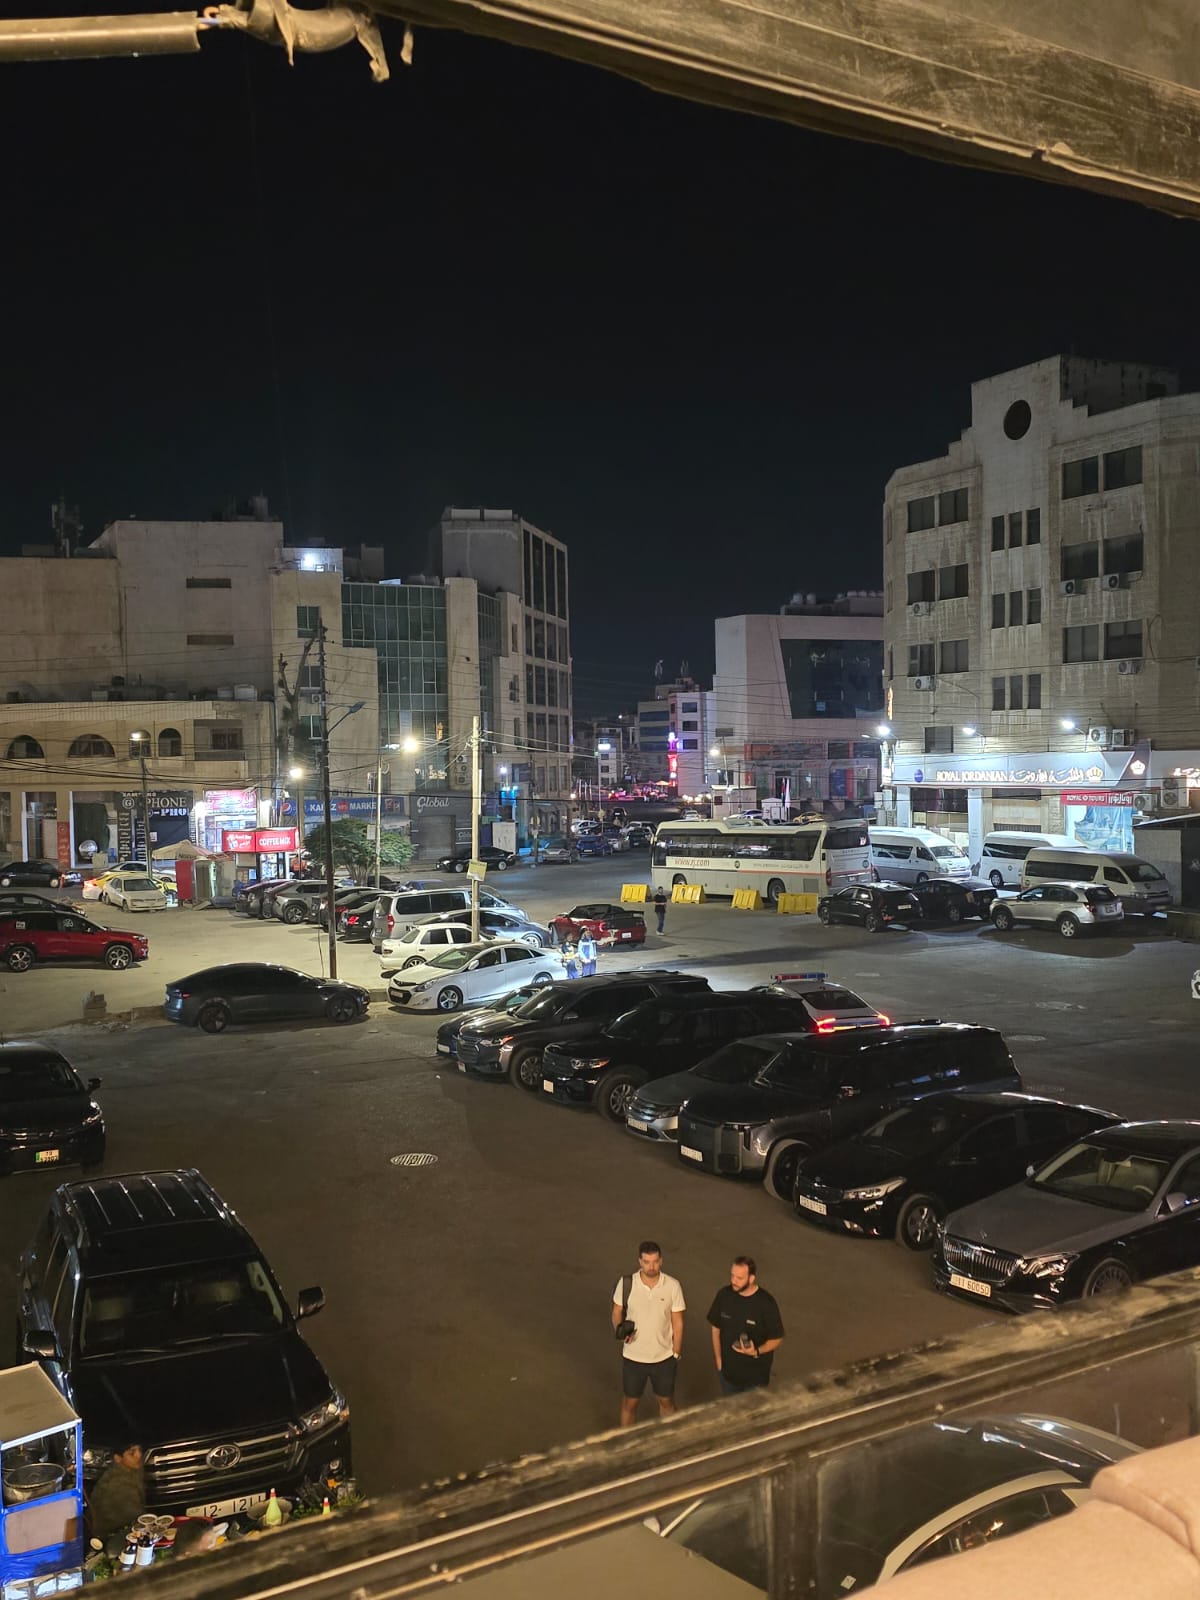

In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# ✅ Load the trained model
model = YOLO("/content/yolo_vehicle_project/yolov8_vehicle_detector/weights/best.pt")

# ✅ Replace 'your_image.jpg' with the actual file name
image_name = "/content/681382cc-d96a-4dbd-95fb-3545579af52c.jpeg"

# ✅ Run prediction
results = model.predict(source=image_name, save=True, conf=0.25)

# ✅ Display the result
pred_path = os.path.join("runs/detect/predict", image_name)
display(Image(filename=pred_path))



image 1/1 /content/4e329426-a22a-4b45-b2a1-16fb1891646b.jpeg: 640x480 (no detections), 9.0ms
Speed: 2.9ms preprocess, 9.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict6


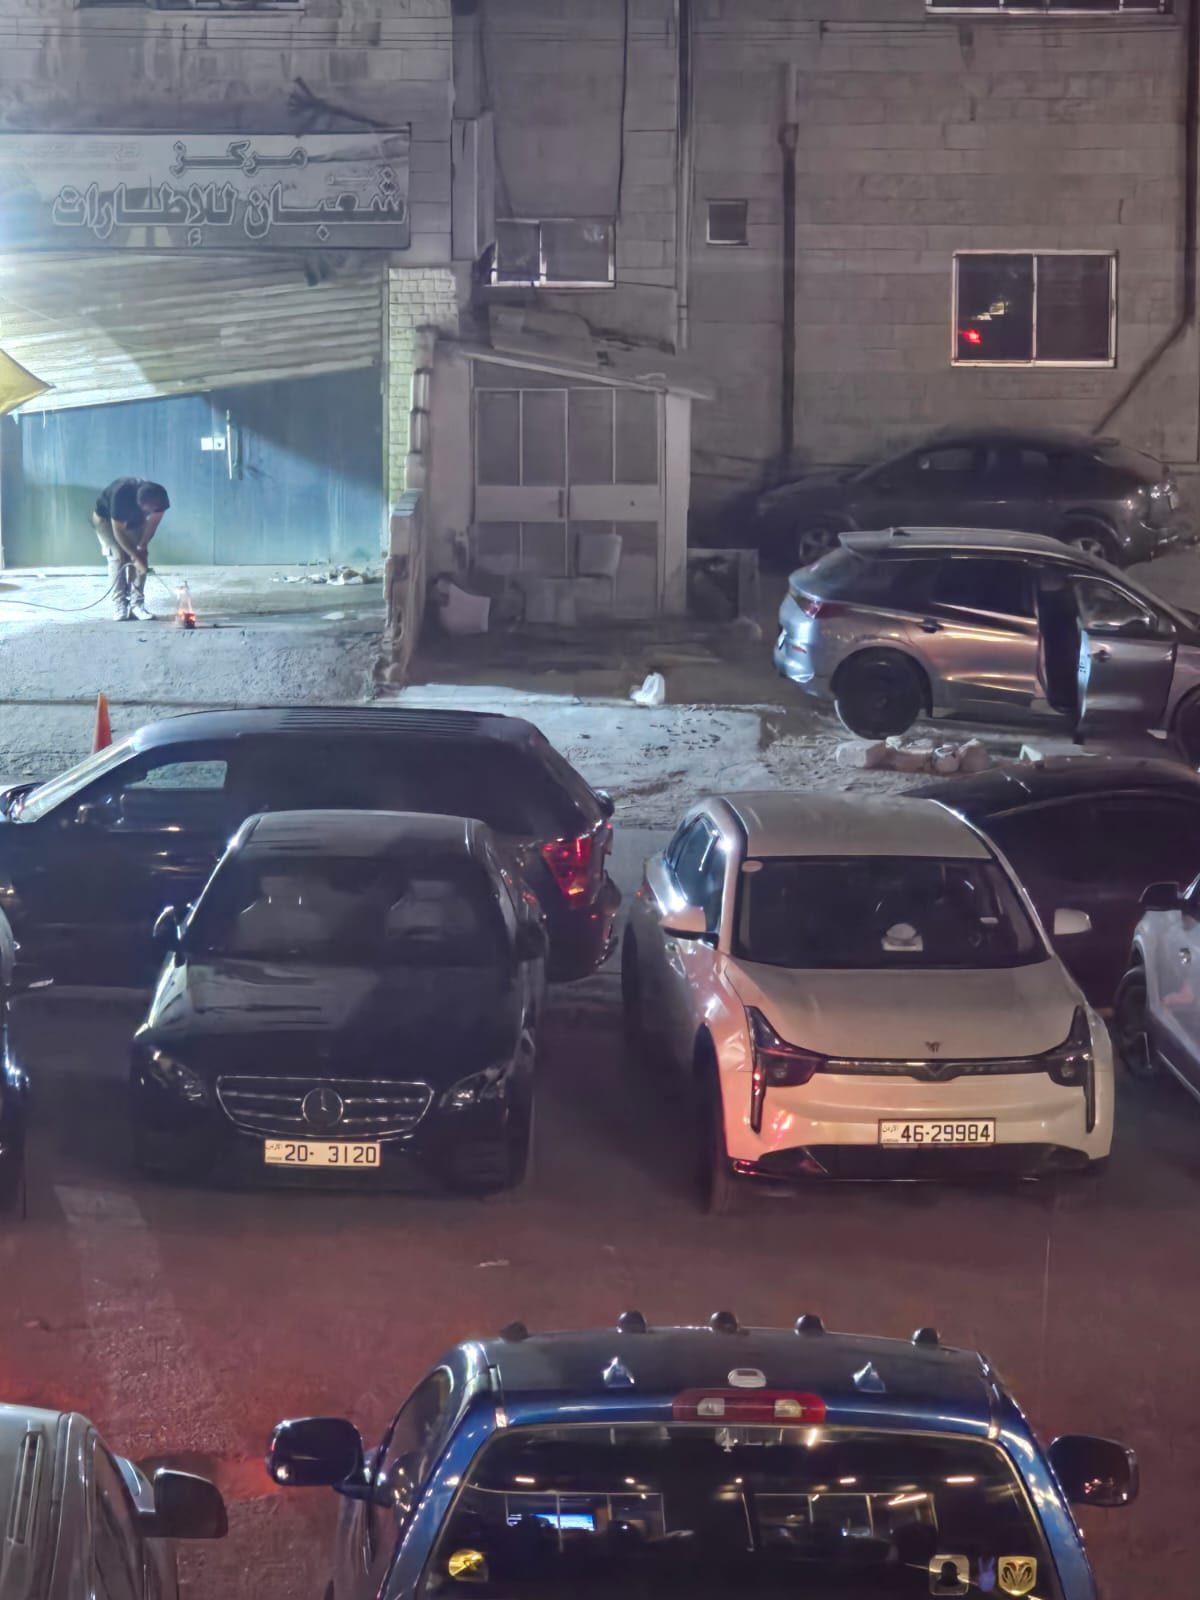

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (1600, 1200)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))


In [ ]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

# ✅ Load the trained model
model = YOLO("/content/yolo_vehicle_project/yolov8_vehicle_detector/weights/best.pt")

# ✅ Replace 'your_image.jpg' with the actual file name
image_name = "/content/4e329426-a22a-4b45-b2a1-16fb1891646b.jpeg"

# ✅ Run prediction
results = model.predict(source=image_name, save=True, conf=0.25)

# ✅ Display the result
pred_path = os.path.join("runs/detect/predict", image_name)
display(Image(filename=pred_path))
print(results[0].boxes)
